# Построение простых решений нестационарного уравнения фильтрации на основе преобразования Лапласа

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

версия 0.2 от 11.10.2021

Хабибуллин Ринат 2021 г.

---

## Содержание:
* [Уравнение фильтрации](#diffusivity-equation)
* [Решение линейного стока](#line-source-solution)

In [1]:
# для того, чтобы скрипты гладко работали на https://colab.research.google.com/ пропишем
# установку библиотеки anaflow которую будем использовать для обратного преобразования Лапласа
!pip install anaflow

In [2]:
# импортируем библиотки, которые могут пригодиться для проведения расчетов
import numpy as np
import matplotlib.pyplot as plt
from anaflow import get_lap_inv
from scipy.special import kn, iv, expi

## Уравнение фильтрации <a class="anchor" id="diffusivity-equation"></a>

Рассматривается уравнение фильтрации в безразмерных переменных 

$$ \frac{\partial p_D}{ \partial t_D} = \frac{1}{r_D}\left[ \frac{ \partial{}}{ \partial{r_D} }\left( r_D \dfrac{\partial p_D}{ \partial r_D} \right) \right]  $$

где введены следующие безразмерные переменные
* $r_D$ - безразмерное расстояние от центра скважины
* $t_D$ - безразмерное время
* $p_D$ - безразмерное давление

Соответствующие определения безразмерных переменных

$$ r_D = \frac{r}{r_w} $$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2}$$
$$ p_D = \frac{kh}{ 18.41 q_s B \mu} \left( p_i - p \right) $$

где в свою очередь 
* $q_s$ - дебит скважины на поверхности, приведенный к нормальным условиям, м3/сут
* $\phi$ - пористость, доли единиц
* $\mu$ - вязкость нефти в пласте, сП
* $B$ - объемный коэффициент нефти, м3/м3
* $p_i$ - начальное давление в пласте, атм
* $p$ - давление забойное, атм
* $c_t$ - общая сжимаемость системы в пласте, 1/атм
* $k$ - проницаемость, мД
* $t$ -  время, час
* $r$ - расстояние от центра скважины, м
* $r_w$ - радиус скважины, м


### Общее решение уравнения фильтрации в пространстве Лапласа
Решение такого уравнение может быть получено с использованием <a href="https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0"
                        target="_blank" rel="noreferrer noopener">преобразования Лапласа</a>.

$$ L \left [ f(t) \right] = \tilde{f}(u) = \int_{0}^{\infty}f(t)e^{-ut}dt $$

где $u$ параметр пространства Лапласа соответствующий времени.

Тогда уравнение в пространстве Лапласа преобразуется к виду:

$$ u \tilde{p}_D  =  \dfrac{1}{r_D} \left[\dfrac{d}{d r_D} \left(r_D \dfrac{d{\tilde{p}_D}}{d r_D} \right) \right] $$

Это уравнение известно как  <a href="https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%91%D0%B5%D1%81%D1%81%D0%B5%D0%BB%D1%8F"> модифицированное уравнение Бесселя </a>. Общее решение этого уравнения можно записать в виде 

$$ \tilde{p}_D(u, r_D) = A(u) K_0(r_D \sqrt u) + B(u) I_0(r_D \sqrt u) $$

где 
* $u$ - переменная пространства Лапласа, соответствующая времени
* $\tilde{p}_D(u, r_D)$ - изображение давления в пространстве Лапласа
* $K_0, I_0$ - модифицированные функции Бесселя нулевого порядка (могут быть вычислены, например, с использованием реализации в библиотке `scipy.special`)
* $A(u), B(u)$ - произвольные функции, которые могут быть определены при задании начальных и граничных условий

#### Пример построения графиков модифицированных функций Бесселя с использованием `scipy.special` 

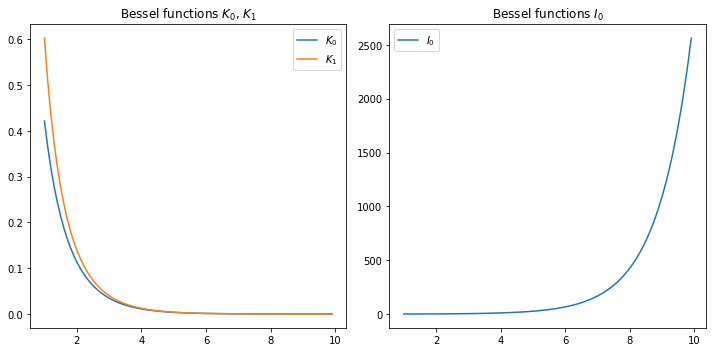

In [3]:
# построим графики модифицированных функций Бесселя
# так как функции K и I обладают разным поведением - построим на разных подграфиках
x = np.arange(1,10,0.1)
k0 = kn(0,x)
k1 = kn(1,x)
I0 = iv(0,x)

plt.rcParams["figure.figsize"] = (10,5)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(x,k0, label='$K_0$')
ax1.plot(x,k1, label='$K_1$')
ax2.plot(x,I0, label='$I_0$')

ax1.set_title("Bessel functions $K_0$, $K_1$")
ax2.set_title("Bessel functions $I_0$")
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

## Решение линейного стока - простейшее решение <a class="anchor" id="line-source-solution"></a>
Для построения частного решения необходимо задать начальные и граничные условия. Простейшее решение можно получить пренебрегаю радиусом скважины для бесконечного пласта. Начальные и граничные условия выглядят следующим образом

1. Однородное начальное давление
$$ p_D(t_D=0, r_D) = 0 $$

2. Граничное условия на бесконечности 

$$\lim_{r_D \to \infty} p_D(r_D, t_D) = 0$$

3. Граничное условие на скважине

$$\lim_{r_D \to 0} \left[ r_D \dfrac{ \partial p_D(r_D, t_D)}{\partial r_D} \right] = -1$$


Граничное условие на скважине (3.) можно понять записать его в размерном виде.

$$\lim_{r \to 0} \left[ r \dfrac{ \partial p(r, t)}{\partial r} \right] = 18.41 \dfrac{qB\mu}{kh} $$

здесь также уместно вспомнить определение $p_D = \dfrac{kh}{ 18.41 q_s B \mu} \left( p_i - p \right)$  и закон Дарси в радиальной форме $q = \dfrac{kh}{18.41 \mu} r \dfrac{dP}{dr}$

Для построения частного решения необходимо исходя из приведенных условий подобрать значения функций $A(u)$ и $B(u)$ для общего решения. 

$$ \tilde{p}_D(u, r_D) = A(u) K_0(r_D \sqrt u) + B(u) I_0(r_D \sqrt u) $$

Глядя на поведение функции $I_0$ на бесконечности, понятно что для нашего случая надо положить $B(u) = 0 $. Удовлетворяя внутреннее граничное условие можно получить $A(u) = \dfrac{1}{u}$

Решение для бесконечно малого радиуса скважины в пространстве Лапласа будет иметь вид

$$ \tilde{p}_D(u) = \frac{1}{u} K_0 \left( r_D \sqrt u  \right) $$

где 

$K_0$ - <a href="https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%91%D0%B5%D1%81%D1%81%D0%B5%D0%BB%D1%8F"
                        target="_blank" rel="noreferrer noopener">модифицированная функция Бесселя&nbsp;</a>
                        
Хотя решения в пространстве Лапласа относительно легко получить -- обратная процедура получения решения в исходных координатах на основе решения в пространстве Лапласа оказывается сложнее. Аналитически это не всегда удается сделать, чаще эту процедуру проводят численно. 

Для численного обратного преобразования Лапласа можно, например, использовать библиотеку <a href="https://mpmath.org/doc/current/calculus/inverselaplace.html"> mpmath </a>. Там же можно найти численную реализацию функций Бесселя. Но такой вариант расчета относительно медленный (смотрите пример `00_некоторые_технические_подробности.ipynb` для подробностей). Дальнейшие расчеты будут основаны на `scipy.special` и `anaflow`. 

## Решение линейного стока с использованием обратного преобразования Лапласа

In [4]:
# пример функции реализующий расчет решения в пространстве Лапласа
def pd_lapl_line_source(u, rd=1):
    """
    расчет решения линейного стока для безразмерного давления в пространстве Лапласа
    u - переменная пространства Лапласа
    rd- безразмерное расстояние от центра скважины
    """
    return 1 / u * kn(0, rd * u**0.5)

# функция расчета безразмерного давления с использованием алгоритма Стефеста
# для численного обратного преобразования Лапласа
def pd_line_source_inv(td, rd=1):
    """
    расчет решения линейного стока для безразмерного давления
    на основе численного обратного преобразования Лапласа (алгоритм Стефеста)
    td - безразмерное давление, число или numpy массив
    rd - безразмерный радиус, по умолчанию rd=1 - соответствует давлению на забое
         число или numpy массив
    результат массив массивов давления от времени
    """
    if isinstance(rd, np.ndarray):
        # если на входе массив, то вручную итерируем по всем элементам и 
        # собираем массив массивов
        res = []
        for ri in rd:
            pd_inv = get_lap_inv(pd_lapl_line_source, arg_dict={"rd":ri}) 
            res.append(pd_inv(td))
        return np.array(res)
    else:
        pd_inv = get_lap_inv(pd_lapl_line_source, arg_dict={"rd":rd})
        return pd_inv(td)

In [5]:
# для сравнения приведем функции из раздела 11
# Решение линейного стока уравнения фильтрации
def pd_ei(td, rd=1):
    """
    Решение линейного стока уравнения фильтрации
    td - безразмерное время, число или numpy массив
    rd - безразмерное расстояние, по умолчанию rd=1 - соответствует давлению на забое
         число или numpy массив
    результат массив массивов давления от времени
    """
    if isinstance(rd, np.ndarray):
        res=[]
        for ri in rd:
            res.append(np.array([-1/2*expi(-ri**2 / 4 / td)]))
        return np.array(res)
    else:
        return np.array([-1/2*expi(-rd**2 / 4 / td)])

#### Пример построения графиков сравнения реализаций решений линейного стока в безразмерных координатах

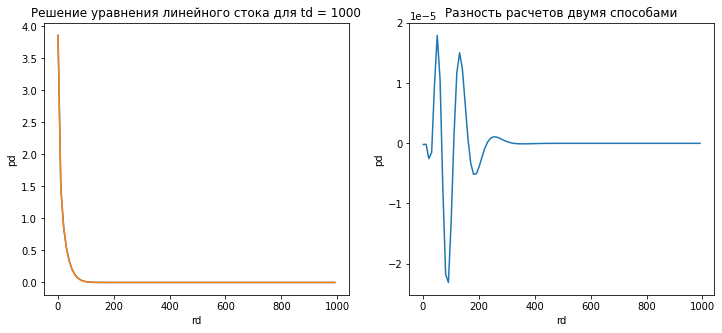

In [6]:
# построим график безразмерного давления от расстояния
# двумя способами и их разницу также
td = 1000
rd_arr = np.arange(1, 1000 ,10)
# при построении используем векторный расчет
plt.rcParams["figure.figsize"] = (12,5)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(rd_arr, pd_ei(td, rd_arr) )
ax1.plot(rd_arr, pd_line_source_inv(td, rd_arr) )

ax2.plot(rd_arr, pd_ei(td, rd_arr) - pd_line_source_inv(td, rd_arr))
ax1.set_title("Решение уравнения линейного стока для td = {}".format(td))
ax2.set_title("Разность расчетов двумя способами")
ax1.set_xlabel("rd")
ax1.set_ylabel("pd")
ax2.set_xlabel("rd")
ax2.set_ylabel("pd")
plt.show()

### Определение функции для перевода размерных и безразмерных величин

In [7]:
# определим функции для перевода размерных переменных в безразмерные и обратно
# пригодится потом для построения графиков и ведения расчетов

# при наименовании функций придерживаемся следующих соглашений
# сначала идет название того, что считаем
# в конце указывается размерность результата, если это уместно

def r_from_rd_m(rd, rw_m=0.1):
    """
    перевод безразмерного расстояния в размерное
    rd -  безразмерное расстояние
    rw_m -  радиус скважины, м
    """
    return rd*rw_m

def rd_from_r(r_m, rw_m=0.1):
    """
    перевод размерного расстояния в безразмерное
    r_m - размерное расстояние, м
    rw_m - радиус скважины, м
    """
    return r_m/rw_m

def t_from_td_hr(td, k_mD=10, phi=0.2, mu_cP=1, ct_1atm=1e-5, rw_m=0.1):
    """
    перевод безразмерного времени в размерное, результат в часах
    td - безразмерное время
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return td * phi * mu_cP * ct_1atm * rw_m * rw_m / k_mD / 0.00036

def td_from_t(t_hr, k_mD=10, phi=0.2, mu_cP=1, ct_1atm=1e-5, rw_m=0.1):
    """
    перевод размерного времени в безразмерное
    t_hr - размерное время, час
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return  0.00036 * t_hr * k_mD / (phi * mu_cP * ct_1atm * rw_m * rw_m) 

def p_from_pd_atma(pd, k_mD=10, h_m=10, q_sm3day=20, b_m3m3=1.2, mu_cP=1, pi_atma=250):
    """
    перевод безразмерного давления в размерное, результат в абсолютных атмосферах
    pd - безразмерное давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return pi_atma - pd * 18.41 * q_sm3day * b_m3m3 * mu_cP / k_mD / h_m 

def pd_from_p(p_atma, k_mD=10, h_m=10, q_sm3day=20, b_m3m3=1.2, mu_cP=1, pi_atma=250):
    """
    перевод размерного давления в безразмерное
    p_atma - давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return (pi_atma - p_atma) / (18.41 * q_sm3day * b_m3m3 * mu_cP) * k_mD * h_m 

#### Пример построения графиков сравнения реализаций решений линейного стока в размерных координатах

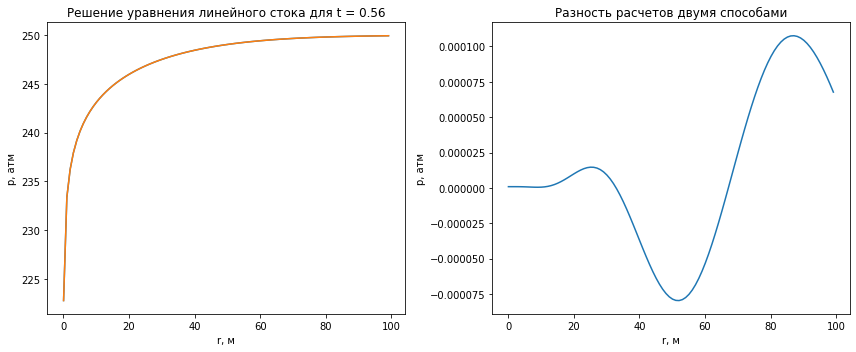

In [16]:
# построим график безразмерного давления от расстояния в безразмерных переменных
# двумя способами и их разницу также
td = 100000
rd_arr = np.arange(1, 1000 ,10)
# при построении используем векторный расчет
plt.rcParams["figure.figsize"] = (12,5)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(r_from_rd_m(rd_arr), p_from_pd_atma(pd_ei(td, rd_arr)) )
ax1.plot(r_from_rd_m(rd_arr), p_from_pd_atma(pd_line_source_inv(td, rd_arr)) )

ax2.plot(r_from_rd_m(rd_arr), p_from_pd_atma(pd_ei(td, rd_arr)) - 
                              p_from_pd_atma(pd_line_source_inv(td, rd_arr)))
ax1.set_title("Решение уравнения линейного стока для t = {:.2f}".format(t_from_td_hr(td)))
ax2.set_title("Разность расчетов двумя способами")
ax1.set_xlabel("r, м")
ax1.set_ylabel("p, атм")
ax2.set_xlabel("r, м")
ax2.set_ylabel("p, атм")
plt.tight_layout()
plt.show()

## Решение для конечного радиуса скважины

Решение для конечного радиуса скважины в пространстве Лапласа будет иметь вид


$$ \tilde{p}_D(s) = \frac{1}{s^{\frac{3}{2}}} \frac{ K_0 \left( r_D \sqrt s  \right) }{K_1 \left(  \sqrt s  \right)} $$

где 

$K_0$, $K_1$ - <a href="https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%91%D0%B5%D1%81%D1%81%D0%B5%D0%BB%D1%8F"
                        target="_blank" rel="noreferrer noopener">модифицированные функции Бесселя&nbsp;</a>

In [9]:
# пример функции реализующий расчет решения в пространстве Лапласа
def pd_lapl_finite_rw(u, rd=1):
    """
    расчет решения c конечным радиусом скважины для безразмерного давления в пространстве Лапласа
    u - переменная пространства Лапласа
    rd- безразмерное расстояние от центра скважины
    """
    return 1 / u**(3/2) * kn(0, rd * u**0.5) / kn(1, u**0.5)

# функция расчета безразмерного давления с использованием алгоритма Стефеста
# для численного обратного преобразования Лапласа
def pd_finite_rw_inv(td, rd=1):
    """
    расчет решения c конечным радиусом скважины для безразмерного давления
    на основе численного обратного преобразования Лапласа (алгоритм Стефеста)
    td - безразмерное давление, число или numpy массив
    rd - безразмерный радиус, по умолчанию rd=1 - соответствует давлению на забое
         число или numpy массив
    результат массив массивов давления от времени
    """
    if isinstance(rd, np.ndarray):
        # если на входе массив, то вручную итерируем по всем элементам и 
        # собираем массив массивов
        res = []
        for ri in rd:
            pd_inv = get_lap_inv(pd_lapl_finite_rw, arg_dict={"rd":ri}) 
            res.append(pd_inv(td))
        return np.array(res)
    else:
        pd_inv = get_lap_inv(pd_lapl_finite_rw, arg_dict={"rd":rd})
        return pd_inv(td)

#### Сравнение решений линейного стока и конечного радиуса скважины

Построим графики сравнения решений линейного стока и решения с учетом конечного радиуса скважины. Графики будем строить для фиксированного расстояния в зависимости от времени. 

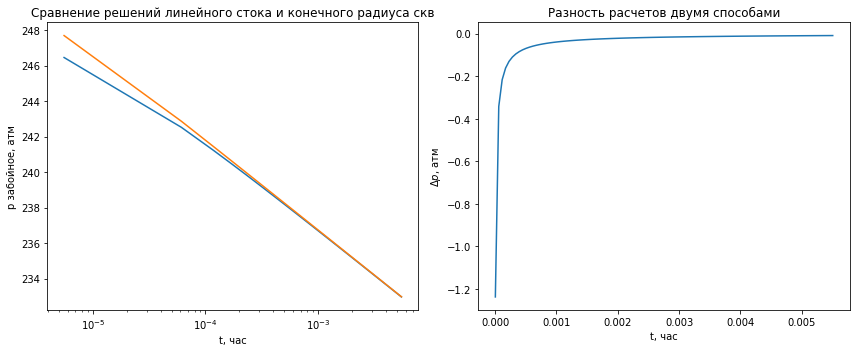

In [15]:
# построим график безразмерного давления от расстояния в безразмерных переменных
# двумя способами и их разницу также
td_arr = np.arange(1, 1e3 ,1e1)
rd = 1  # забойное давление
# при построении используем векторный расчет
plt.rcParams["figure.figsize"] = (12,5)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(t_from_td_hr(td_arr), p_from_pd_atma(pd_finite_rw_inv(td_arr, rd)) )
ax1.plot(t_from_td_hr(td_arr), p_from_pd_atma(pd_line_source_inv(td_arr, rd)) )

ax2.plot(t_from_td_hr(td_arr), p_from_pd_atma(pd_finite_rw_inv(td_arr, rd)) - 
                               p_from_pd_atma(pd_line_source_inv(td_arr, rd)))
ax1.set_title("Сравнение решений линейного стока и конечного радиуса скв")
ax2.set_title("Разность расчетов двумя способами")
ax1.set_xscale('log')
ax1.set_xlabel("t, час")
ax1.set_ylabel("p забойное, атм")
ax2.set_xlabel("t, час")
ax2.set_ylabel("$\Delta p$, атм")
plt.tight_layout()
plt.show()

Видно, что для забойного давления заметные расхождения наблюдаются для времен порядка 0.001 часа или 3 секунд. Следует помнить, что данная размерная оценка получена для заданных по умолчанию параметров скважин и изменение проницаемости или сжимаемости оценку изменит. Однако проведя эксперименты можно убедиться что время для которого расхождения будет заметно все равно останется относительно малым. В этом смысле оценка сходимости решений в безразмерных переменных предпочтительна (не будет зависеть от размерных парамтеров)

Посмотрим, что будет происходить вдали от скважины - меняем только параметр `rd`

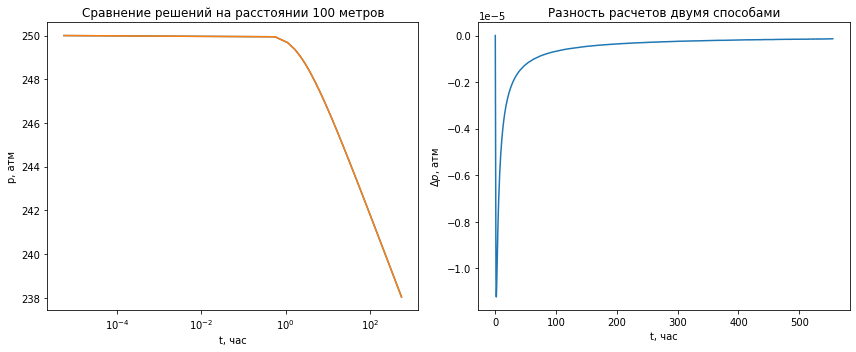

In [14]:
# построим график безразмерного давления от расстояния в безразмерных переменных
# двумя способами и их разницу также
td_arr = np.arange(1, 1e8 ,1e5)
rd = 1000  # забойное давление
# при построении используем векторный расчет
plt.rcParams["figure.figsize"] = (12,5)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(t_from_td_hr(td_arr), p_from_pd_atma(pd_finite_rw_inv(td_arr, rd)) )
ax1.plot(t_from_td_hr(td_arr), p_from_pd_atma(pd_line_source_inv(td_arr, rd)) )

ax2.plot(t_from_td_hr(td_arr), p_from_pd_atma(pd_finite_rw_inv(td_arr, rd)) - 
                               p_from_pd_atma(pd_line_source_inv(td_arr, rd)))
ax1.set_title("Сравнение решений на расстоянии {:.0f} метров".format(r_from_rd_m(rd)))
ax2.set_title("Разность расчетов двумя способами")
ax1.set_xscale('log')
ax1.set_xlabel("t, час")
ax1.set_ylabel("p, атм")
ax2.set_xlabel("t, час")
ax2.set_ylabel("$\Delta p$, атм")
plt.tight_layout()
plt.show()

Видно что вдали от скважины заметных расхождений в решениях нет. Поэтому для решения задач по анализу взаимного влияния скважин широкое применение получило относительно простое решение линейного стока.

# Задания для самостоятельной работы

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте двумерную тепловую карту распределения давления в пласте для модели. 
2. Попробуйте найти другую реализацию расчета обратного преобразования Лапласа на python и сравнете ее с текущим примером на mpmath по скорости и точности (поисковая задача, ответ скорее всего есть, но на текущий момент не известен) 
3. Создайте свою реализацию расчета численного обратного преобразования Лапласа, которая могла бы работать с функциями scipy и проверьте ее на скорость и точность (программистская задача, в качестве базы можно взять реализацию расчета преобразования Стефеста из unifloc VBA)
